In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import pandas as pd
from avgn.utils.paths import DATA_DIR, most_recent_subdirectory, ensure_dir
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
from tqdm.autonotebook import tqdm

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [4]:
from avgn.visualization.projections import scatter_spec
from avgn.utils.general import save_fig
from avgn.utils.paths import FIGURE_DIR, ensure_dir

In [5]:
DATASET_ID = 'BIRD_DB_Vireo_cassinii'

In [6]:
datasets = list((DATA_DIR / 'embeddings' / DATASET_ID / 'indvs').glob('*.pickle'))
datasets = pd.DataFrame([[i.parent.stem, i.stem, i] for i in datasets], columns = ['ds', 'indv', '_loc'])

In [7]:
datasets[:3]

,ds,indv,_loc
0,indvs,GAY,/mnt/cube/tsainbur/Projects/github_repos/avgn_...
1,indvs,Meadow,/mnt/cube/tsainbur/Projects/github_repos/avgn_...
2,indvs,Gate CAVI,/mnt/cube/tsainbur/Projects/github_repos/avgn_...


In [8]:
syllable_df = pd.read_pickle(datasets.iloc[0]['_loc'])

In [9]:
syllable_df[:3]

,start_time,end_time,labels,indv,indvi,subject_importance,key,rate,spectrogram,umap
0,1.874944,2.171230,fg,GAY,0,Primary subject,2014-06-16_08-19-00-000000,44100,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[-15.028024673461914, -2.554471492767334]"
1,4.359240,4.697853,ck,GAY,0,Primary subject,2014-06-16_08-19-00-000000,44100,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[7.98782205581665, 15.562314987182617]"
2,6.036912,6.344742,ea,GAY,0,Primary subject,2014-06-16_08-19-00-000000,44100,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[1.4447929859161377, 5.197952747344971]"


GAY 1068


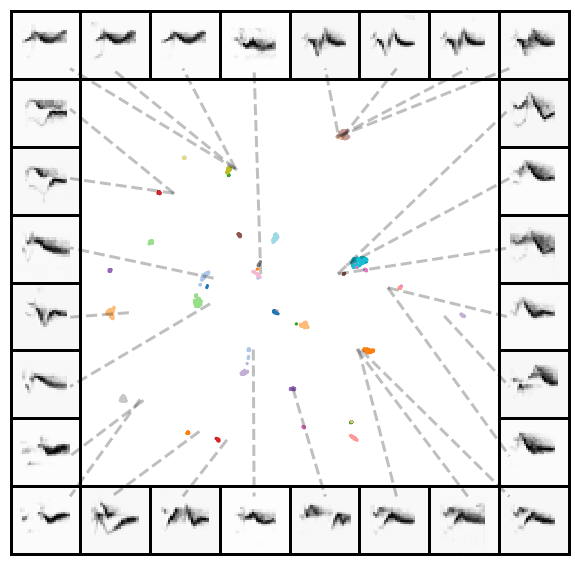

Meadow 1515


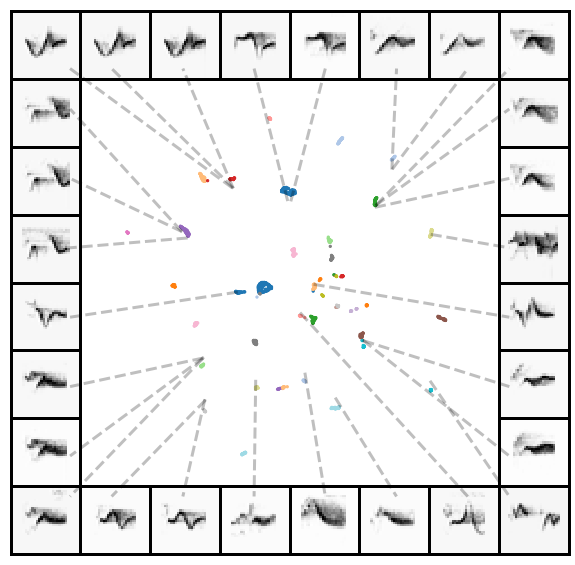

Gate CAVI 1136


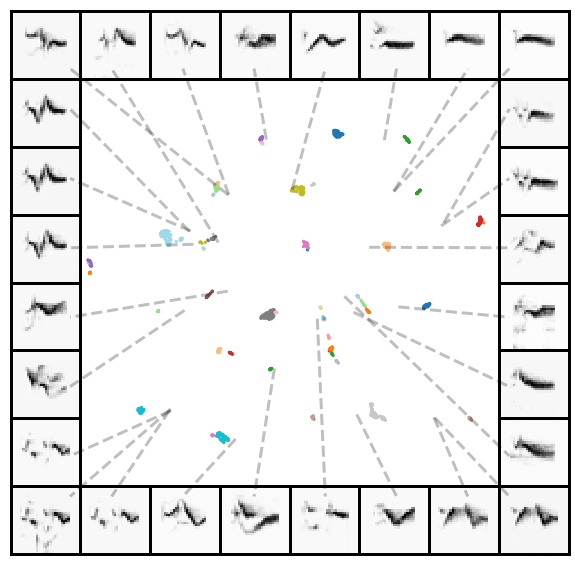

WABk 7373


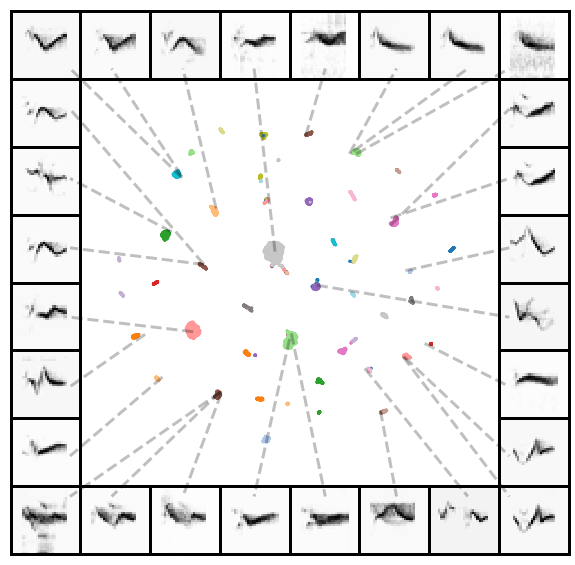

Unbanded East 2324


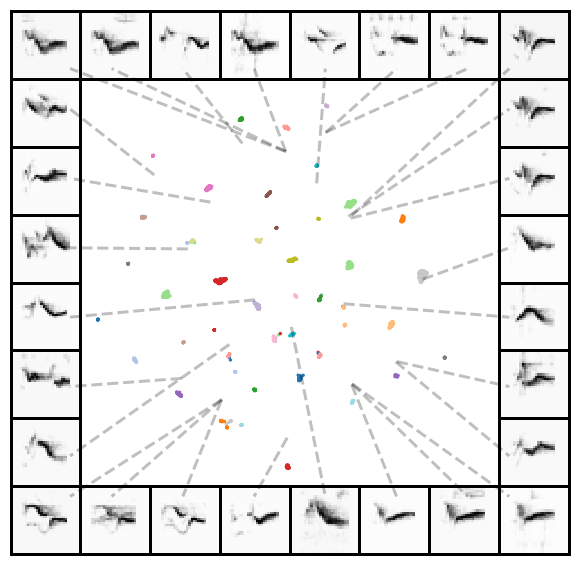

AGO 4595


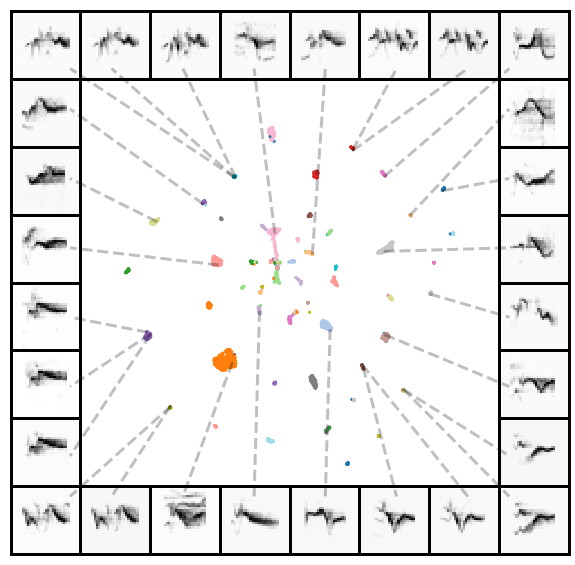

YBuA 2638


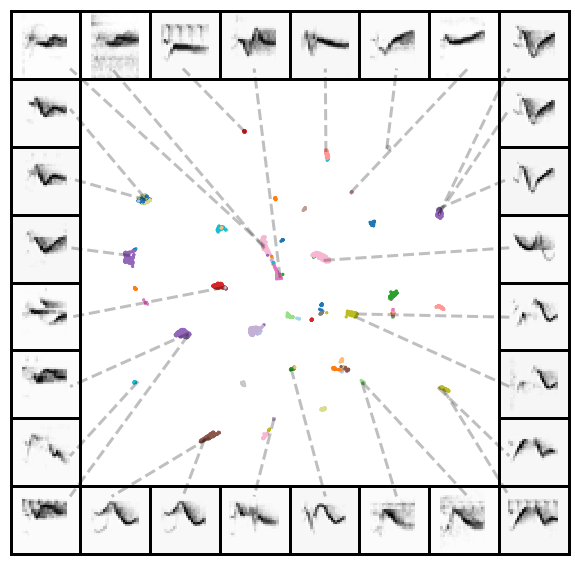

AOBu 7704


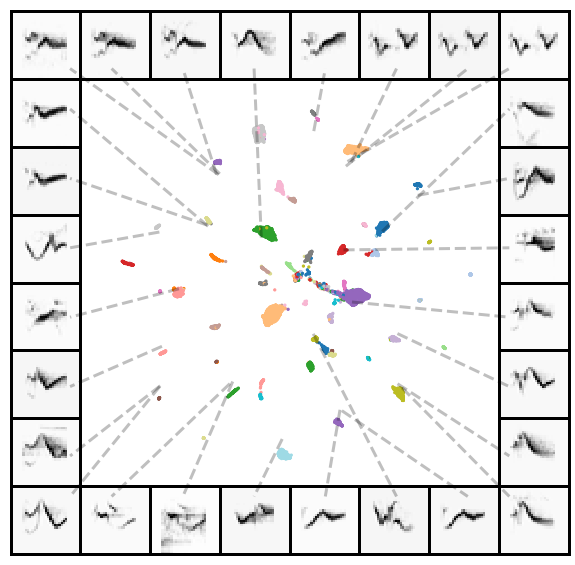

GRA 3045


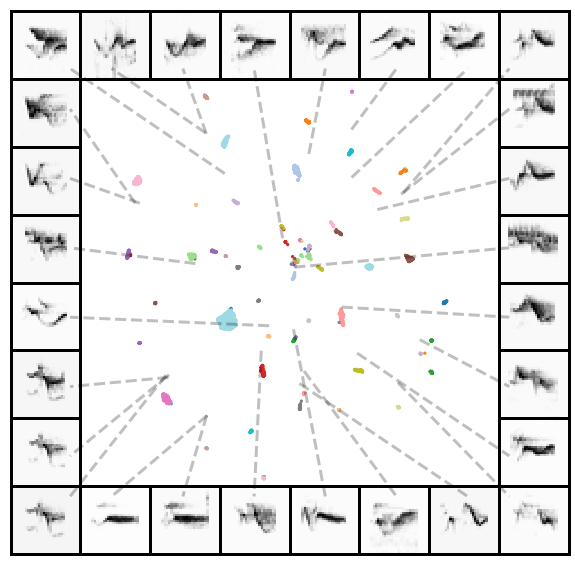

ORA 2805


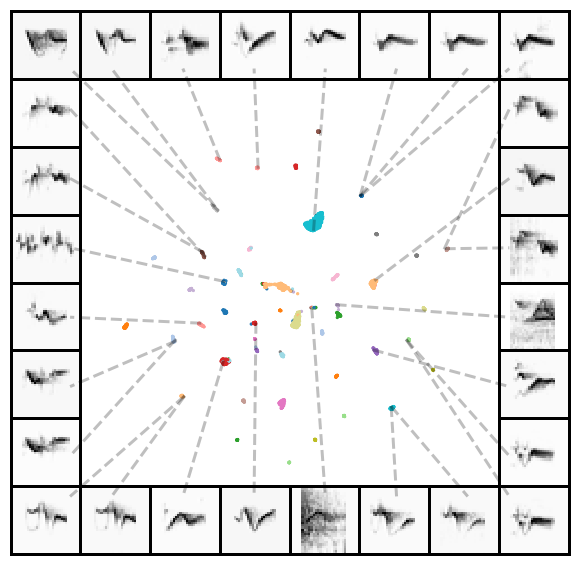

AYO 1543


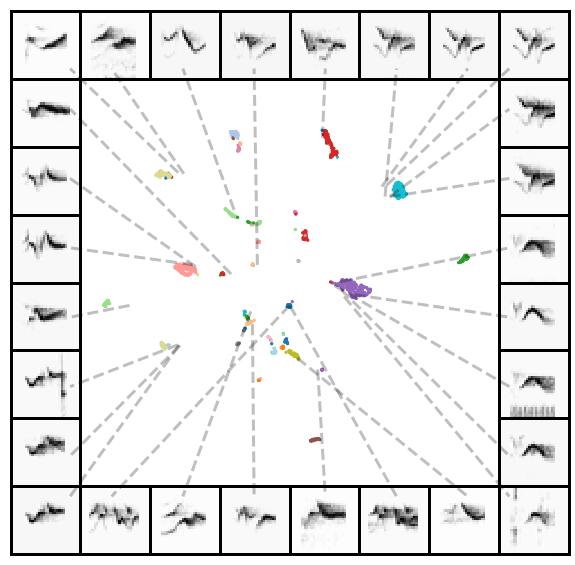

BuRA 5527


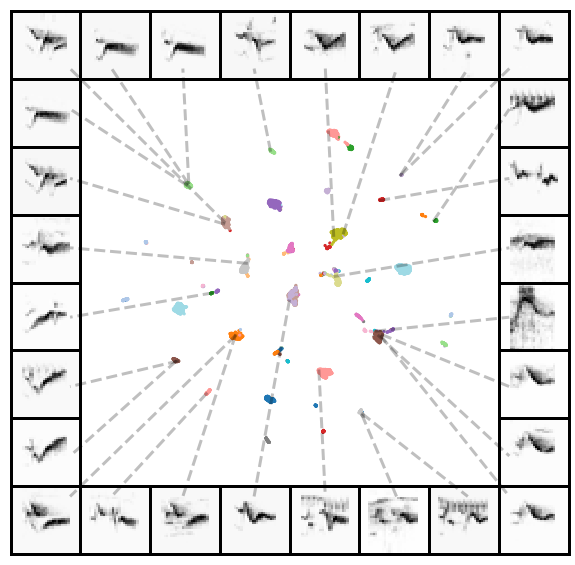

AGBk 9875


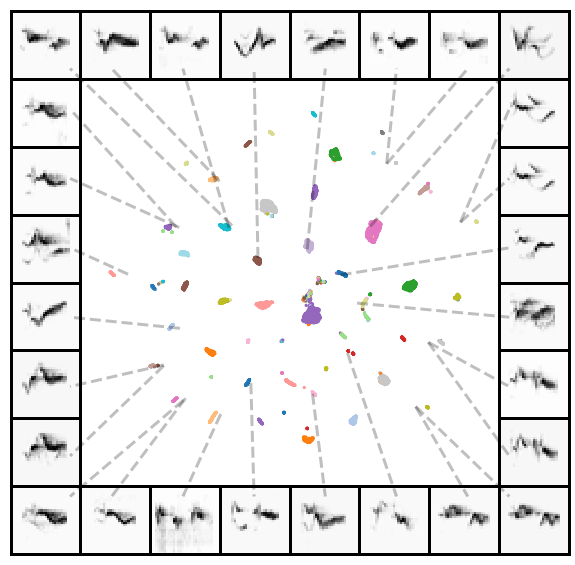

RYA 3582


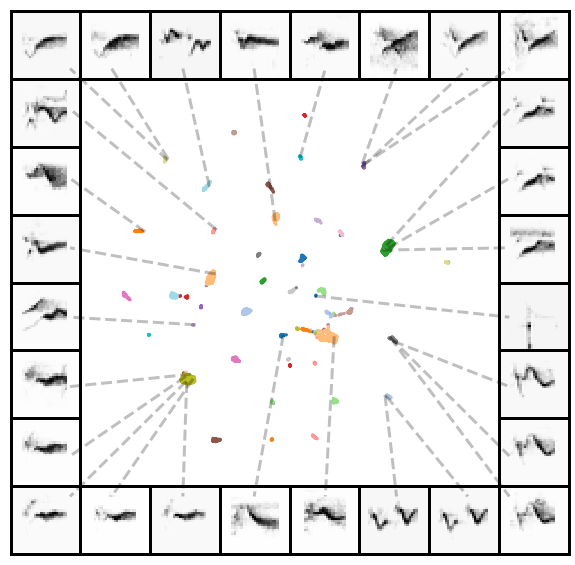

YAW 3422


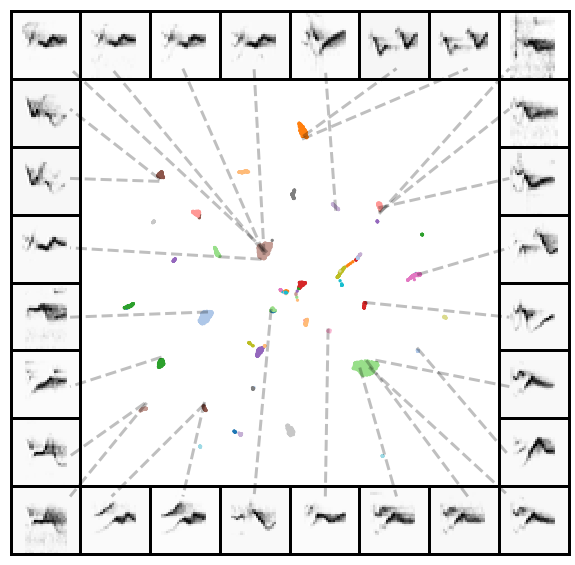

In [11]:
for idx, row in datasets.iterrows():
    syllable_df = pd.read_pickle(row['_loc'])
    embedding = np.vstack(syllable_df.umap.values)
    print(row.indv, len(embedding))
    specs = list(syllable_df.spectrogram.values)
    scatter_spec(
        embedding,
        specs,
        column_size=8,
        #x_range = [-4.5,4],
        #y_range = [-4.5,5.5],
        pal_color="hls",
        color_points=False,
        enlarge_points=0,
        figsize=(10, 10),
        range_pad = 0.15,
        scatter_kwargs = {
            'labels': syllable_df.labels.values,
            'alpha': 1,
            's': 5,
            'show_legend': False
        },
        matshow_kwargs = {
            'cmap': plt.cm.Greys
        },
        line_kwargs = {
            'lw':3,
            'ls':"dashed",
            'alpha':0.25,
        },
        draw_lines=True,
        n_subset= 1000,
        border_line_width = 3,

    );
    plt.show()
    #save_fig(FIGURE_DIR / 'discrete_umap' / ds, dpi=300, save_jpg=True, save_png=True)
    #break